 # Neural Network Optimizers
 
 The cost function that we want to minimize in neural networks is difference between the output of neural networks and expected output. This should be near zero. We have a set of training data and their corresponding output from a function that we don't have (an ideal image classifier for example). Just like regression that we might use linear regression or polynomial to approximate the underlying function that we try to estimate. 

Since computational graphs  can calculate any function, we use them to estimate the function that we don't have, but we have some samples of that.  The parameters of the neural networks are $W$, $b$ but the parameters of the cost function are $X,W,b$ and output is $y_{nn}-y_{lable}$

Imagine your network is only consisting of only one weight and your input has only 1 dimension. $x$. Cost function might look something like this:

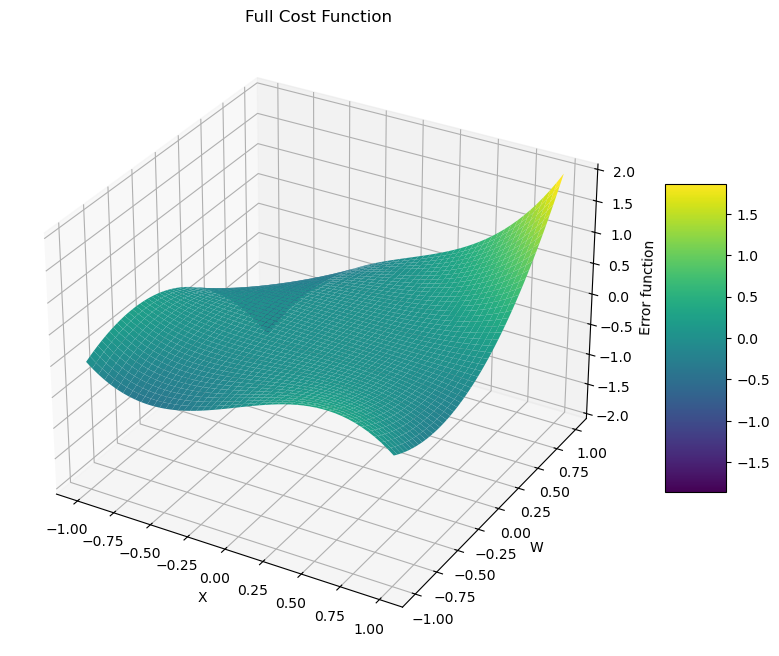

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 1. Full cost function visualization
x = np.linspace(-1, 1, 50)
w = np.linspace(-1, 1, 50)
X, W = np.meshgrid(x, w)
Z = W*X**3 + X*W**2

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(X, W, Z, linewidth=0, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('W')
ax1.set_zlabel('Error function')
ax1.set_title('Full Cost Function')
fig1.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
plt.show()


This surface will show you if you choose a specific item from training set, $x=-0.5$ and you choose different $w$ what would be the value of error function:

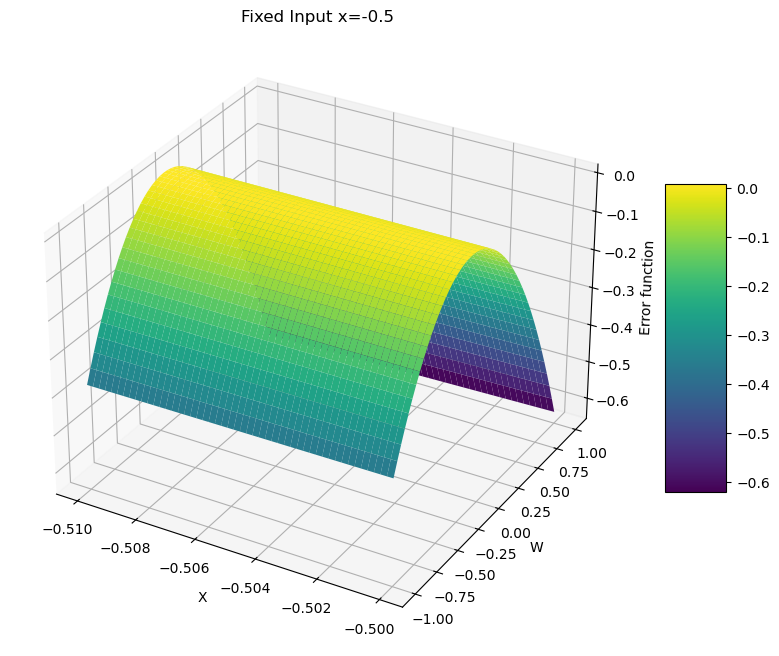

In [15]:

# 2. Fixed input x=-0.5
x = np.linspace(-0.5, -0.51, 50)
w = np.linspace(-1, 1, 50)
X, W = np.meshgrid(x, w)
Z = W*X**3 + X*W**2

fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(X, W, Z, linewidth=0, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('W')
ax2.set_zlabel('Error function')
ax2.set_title('Fixed Input x=-0.5')
fig2.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)
plt.show()

This surface will show you if you set $w=-1.0$ for your model, what would be the value of error function for all $x$:

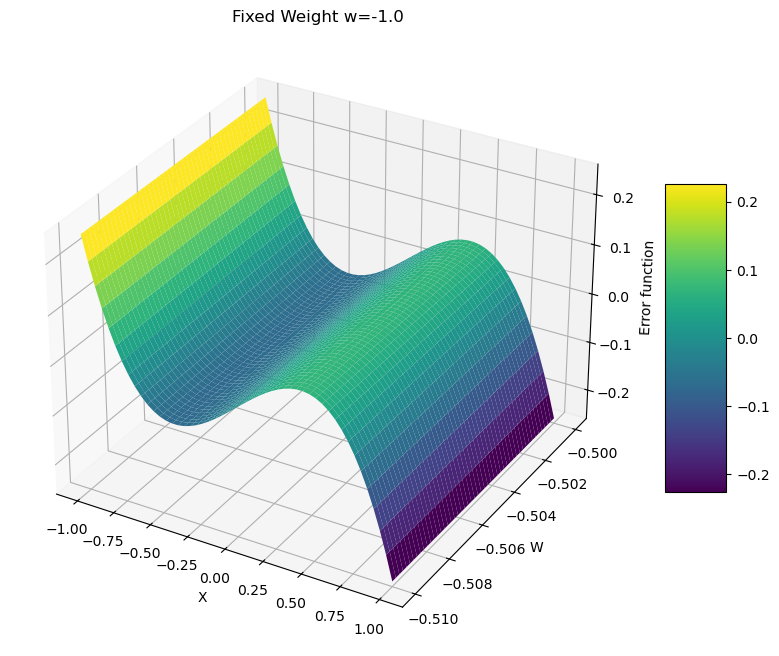

In [16]:
# 3. Fixed weight w=-1.0
x = np.linspace(-1, 1, 50)
w = np.linspace(-0.5, -0.51, 50)
X, W = np.meshgrid(x, w)
Z = W*X**3 + X*W**2

fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111, projection='3d')
surf3 = ax3.plot_surface(X, W, Z, linewidth=0, cmap='viridis')
ax3.set_xlabel('X')
ax3.set_ylabel('W')
ax3.set_zlabel('Error function')
ax3.set_title('Fixed Weight w=-1.0')
fig3.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)
plt.show()

In practice we have a few samples from $x$ and we are looking for right $w$ to minimize the lost. If we have more than one dimension for $w$  (i.e. 2) we have to iterate over all of them (brute force) to find a right one which in practice is impossible. Also we don't have all values for $x$ and we have only few samples from that (imagine $x$ in higher dimension which could be photos of a dog, only know for some certain values in $x$ the output could be a dog) so in practice we have something like this:

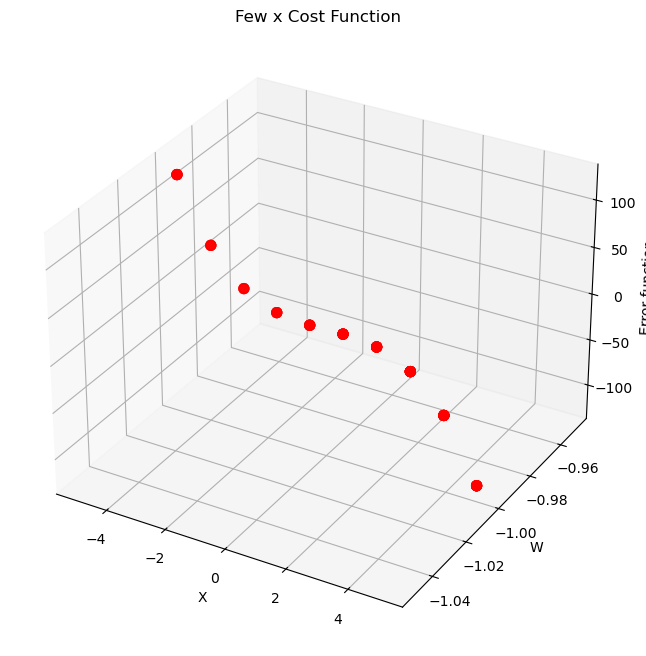

In [17]:
# 4. Few x cost function
X = np.linspace(-5, 5, 10)
w = -1.0
W = np.linspace(w, w, 10)
x_s = []
w_s = []
z_s = []

for x in X:
    for w in W:
        z = w*x**3 + x*w**2
        z_s.append(z)
        x_s.append(x)
        w_s.append(w)

fig4 = plt.figure(figsize=(10, 8))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(x_s, w_s, z_s, c='red', s=50)
ax4.set_xlabel('X')
ax4.set_ylabel('W')
ax4.set_zlabel('Error function')
ax4.set_title('Few x Cost Function')
plt.show()

As it can be seen, for this fixed $w$, for some of inputs, the output error is small and for others it is big, we need to find a new $w$ such that for all $x$ the loss function is small.

So inorder to estimate the actuall unknown function that we have some sample from that in our training set, We select different number of hidden layer and size forthem. In our simple case we use some polynomial, so we will have a function $f(w,x)=error$

We compute the derivative $f(w,x)$ w.r.t $w$, $\frac{df}{dw}$. We set some random value for $w$, and plug all $x$ from our  training set into this derivative function: $\frac{df}{dw}$. Then we make average over all values and update the $w$ based on gradient descent function:

$w_{n+1} = w_{n} + \text{learning\_rate} \times \frac{1}{m} \sum_{i=1}^{m} \frac{df(x_i)}{dw}$

##  1. **SGD (Stochastic Gradient Descent)**
```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
```

####  Equation:
$
x_{t+1} = x_t - \eta \cdot \nabla f(x_t)
$

With momentum:

$
v_{t+1} = \mu v_t + \eta \cdot \nabla f(x_t) 
$


$
x_{t+1} = x_t - v_{t+1}
$



---




#### L2 Regularization (in loss function):
This adds a term to the loss:

$ \text{Loss}_{\text{total}} = \text{Loss}_{\text{data}} + \lambda \cdot \sum w^2 $

So the gradients are computed **after adding this term to the loss**.

---

####  Weight Decay (in optimizer):
This modifies the weight update step directly:

$ w \leftarrow w - \eta \cdot (\nabla_w L + \lambda w) $

Where:
- $\eta$ is the learning rate
- $\lambda$ is the weight decay

So, **even if the original loss doesn't include L2**, the weights are still "decaying" during optimization.

---

###  Important Difference

In PyTorch's SGD (and Adam, etc.), `weight_decay` **is not applied via the loss function**, but rather **added to the gradient** during parameter updates. So, mathematically they **look the same**, but implementation-wise, weight decay is part of the optimizer — not the model or loss.

---

###  When Would It Matter?
- If you manually apply L2 regularization (adding `lambda * sum(params**2)` to your loss), and also use `weight_decay`, you’ll **double penalize** the weights.
- Some optimizers (like `AdamW`) separate weight decay properly, which was an issue in earlier Adam implementations (which mixed L2 regularization and weight decay incorrectly).

---

###  Best Practice
Just use `weight_decay` in the optimizer unless you have a reason to customize your regularization.

---






Iteration 0, Loss: 6.0000, LR: 0.100000
xy: [2.79997 2.79997], loss: 5.279904
Gradient norm: 2.828427
Iteration 10, Loss: 4.0000, LR: 0.100000
xy: [2.2542527 2.2542527], loss: 4.129289
Gradient norm: 0.012378
Iteration 20, Loss: 4.2442, LR: 0.100000
xy: [1.6877757 1.6877757], loss: 4.194968
Gradient norm: 0.988243
Iteration 30, Loss: 4.0038, LR: 0.100000
xy: [1.9519011 1.9519011], loss: 4.004627
Gradient norm: 0.124092
Iteration 40, Loss: 4.0269, LR: 0.100000
xy: [2.114988 2.114988], loss: 4.026444
Gradient norm: 0.327984
Iteration 50, Loss: 4.0019, LR: 0.100000
xy: [2.0016334 2.0016334], loss: 4.000005
Gradient norm: 0.086442
Iteration 60, Loss: 4.0027, LR: 0.100000
xy: [1.9595453 1.9595453], loss: 4.003273
Gradient norm: 0.103511
Iteration 70, Loss: 4.0005, LR: 0.100000
xy: [2.0045562 2.0045562], loss: 4.000041
Gradient norm: 0.043216
Iteration 80, Loss: 4.0002, LR: 0.100000
xy: [2.013364 2.013364], loss: 4.000357
Gradient norm: 0.030040
Early stopping: Gradient norm below threshold 

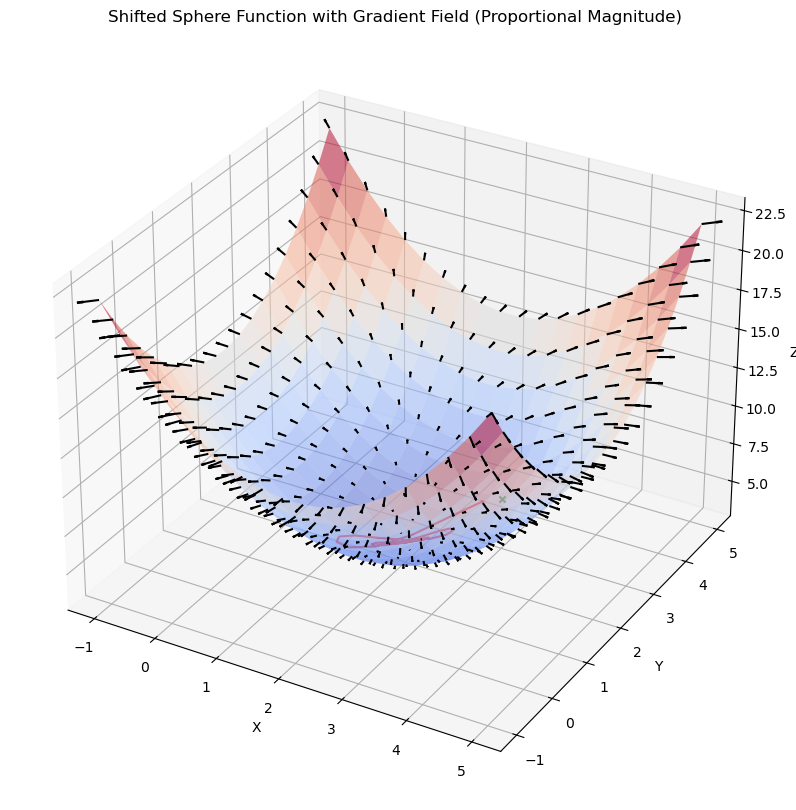

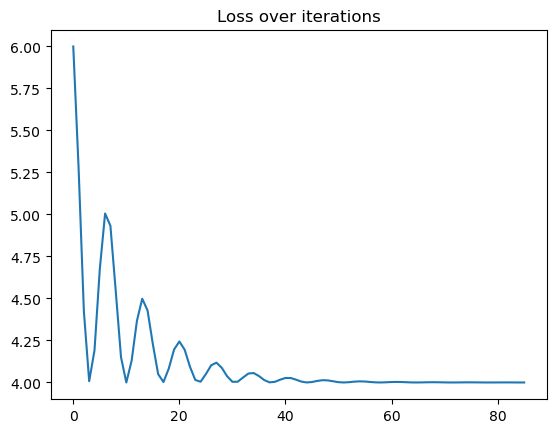

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import torch
import torch.optim as optim
import numpy as np



def Sphere(x, y, x_0=2, y_0=2, z_0=4):
    return (x - x_0)**2 + (y - y_0)**2+z_0


# Initialize parameters for optimization
xy = torch.tensor([3.0, 3.0], requires_grad=True)  # Starting point
optimizer = torch.optim.SGD([xy], lr=0.1, momentum=0.9, weight_decay=1e-4)

scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)


path_x = []
path_y = []
path_z = []

x_start = xy[0].detach().item()
y_start = xy[1].detach().item()
z_start = Sphere(x_start, y_start)

# Optimization loop
n_iterations = 200
tolerance = 1e-3  # Tolerance for early stopping
min_grad_norm = 1e-3  # Minimum gradient norm for early stopping

for i in range(n_iterations):
    optimizer.zero_grad()
    loss = Sphere(xy[0], xy[1])
    loss.backward()

    # Calculate gradient norm for early stopping
    grad_norm = torch.norm(torch.tensor([xy.grad[0], xy.grad[1]]))

    optimizer.step()
    # scheduler.step()

    # Store the path
    path_x.append(xy[0].detach().item())
    path_y.append(xy[1].detach().item())
    path_z.append(loss.detach().item())

    if i % 10 == 0:
        print(f'Iteration {i}, Loss: {loss.item():.4f}, LR: {scheduler.get_last_lr()[0]:.6f}')
        print(f"xy: {xy.detach().numpy()}, loss: {Sphere(xy[0], xy[1]).item():.6f}")
        print(f"Gradient norm: {grad_norm.item():.6f}")

    # Early stopping conditions
    if loss.item() < tolerance:
        print(f"Early stopping: Loss below tolerance {tolerance}")
        break
    if grad_norm < min_grad_norm:
        print(f"Early stopping: Gradient norm below threshold {min_grad_norm}")
        break


# Create a grid of points
x = torch.linspace(-1, 5, 20)  # Adjusted range to show the minimum at (2,2)
y = torch.linspace(-1, 5, 20)
X, Y = torch.meshgrid(x, y, indexing='ij')

# Calculate the function values
Z = Sphere(X, Y)

# Calculate partial derivatives
X.requires_grad_(True)
Y.requires_grad_(True)
Z = Sphere(X, Y)

# Calculate gradients
# .sum() because autograd needs a scalar to differentiate.
grad_x = torch.autograd.grad(Z.sum(), X, create_graph=True)[0]
grad_y = torch.autograd.grad(Z.sum(), Y, create_graph=True)[0]

# Calculate gradient magnitudes for scaling
grad_magnitude = torch.sqrt(grad_x**2 + grad_y**2)
max_magnitude = grad_magnitude.max().item()
# Reduced scale factor for better visualization
scale_factor = 0.3 / max_magnitude

# Create the figure
fig = plt.figure(figsize=(12, 10))
axe = fig.add_subplot(111, projection='3d')

# Plot the surface
axe.plot_surface(X.detach().numpy(), Y.detach().numpy(), Z.detach().numpy(),
                 cmap=cm.coolwarm, alpha=0.5)

# Create a 2D quiver plot of the gradient field with proportional sizes
axe.quiver(X.detach().numpy(), Y.detach().numpy(), Z.detach().numpy(),
           grad_x.detach().numpy(), grad_y.detach().numpy(),
           torch.zeros_like(Z).detach().numpy(),
           length=scale_factor, normalize=False, color='black')

# Add labels and title
axe.set_xlabel('X')
axe.set_ylabel('Y')
axe.set_zlabel('Z')
axe.set_title('Shifted Sphere Function with Gradient Field (Proportional Magnitude)')

axe.scatter(x_start, y_start, z_start, color='green', marker='x')
axe.plot(path_x, path_y, path_z, 'r-')

print("x,y,z", xy[0].detach().item(),xy[1].detach().item(), Sphere(xy[0], xy[1]).item())


plt.show()

plt.plot(path_z)
plt.title("Loss over iterations")
plt.show()



**Quiver Plot in 3D**: The quiver plot draws arrows (vectors) showing gradient direction at each point.


```python
axe.quiver(X, Y, Z,
           grad_x, grad_y,
           torch.zeros_like(Z),  # <- z-direction component of the gradient
           length=scale_factor, normalize=False, color='black')
```



**`axe.quiver(x, y, z, u, v, w)`**
- **`x, y, z`**: starting point of each arrow (in 3D).
- **`u, v, w`**: vector components of the arrow (in 3D).

Since  surface is `z = f(x, y) = x² + y²`, the **gradient lies in the xy-plane**. So, the vector has **no z component**, which is why you use `w = 0`.

So this line:
```python
torch.zeros_like(Z)
```
means the vector doesn't move up or down in the Z direction.

gradient has no Z component because:
- `Z = f(x, y)` is a scalar field.
- The gradient of `f` is a vector in the **xy plane**: $(\partial f/\partial x, \partial f/\partial y)$.
- In 3D, you're visualizing the gradient field projected onto the surface `z = f(x, y)` — so you draw vectors **tangent to the surface** in the XY direction.

---
- **Gradients** are computed using `autograd` on the **summed scalar field**.
- **Quiver in 3D** places arrows at `(x, y, z=f(x, y))` with direction `(∂f/∂x, ∂f/∂y, 0)`.
- These arrows show the steepest ascent **along the surface**, not into the Z-axis.

---

Let me know if you want to plot the **negative gradient field** (for descent), or overlay arrows along the **optimization path** too — that’s also very informative visually!

##  2. **Adam (Adaptive Moment Estimation)**
```python
torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999))
```


####  Equation:
$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla f(x_t) 
$

$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla f(x_t))^2 
$

$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t} 
$
$
x_{t+1} = x_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$


####  Properties:
- Combines **momentum** and **adaptive learning rate**
- Keeps track of **moving averages of gradient and squared gradient**
- Usually requires **less tuning** than SGD

####  When to Use:
- Deep learning models (CNNs, RNNs, Transformers)
- Works well out of the box
- Most popular choice for **research and prototyping**

####  Be Careful:
- May generalize worse than SGD in some cases
- Can converge to sharp minima

---

##  3. **AdamW (Adam with decoupled weight decay)**
```python
torch.optim.AdamW(params, lr=0.001, weight_decay=0.01)
```

####  Equation:

$
x_{t+1} = x_t - \eta \left( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda x_t \right)
$



####  Properties:
- Like Adam but fixes how weight decay is applied
- **Recommended for transformers and NLP models**

####  When to Use:
- Training large models like BERT, Vision Transformers
- When using learning rate schedulers like `cosine annealing`

####  Popular in:
- HuggingFace Transformers
- Vision transformer training

---


<img src="images/step_size_momentum.gif" />

`AdamW` is a variant of the Adam optimizer that **decouples weight decay from the optimization step**, which leads to better regularization and generalization compared to the standard `Adam` with L2 regularization.


In `Adam`, weight decay was incorrectly implemented as L2 regularization—adding it directly to the gradient. But this interferes with Adam’s adaptive moment estimates.

**AdamW corrects this** by applying weight decay **directly to the weights** after the gradient update:



**Adam with Incorrect L2 Regularization**

This is the **incorrect** way (used in classic Adam):

$
\theta_{t+1} = \theta_t - \eta \left( \nabla_{\theta} \mathcal{L}(\theta_t) + \lambda \theta_t \right)
$

- $ \eta $: learning rate  
- $ \lambda $: weight decay coefficient  
- $ \nabla_{\theta} \mathcal{L}(\theta_t) $: gradient of the loss

---

**AdamW (Correct Decoupled Weight Decay)**

This is the **correct** AdamW approach:

$
\theta_{t+1} = \left( \theta_t - \eta \nabla_{\theta} \mathcal{L}(\theta_t) \right) \cdot (1 - \eta \lambda)
$

Alternatively, split into two steps for clarity:

1. Gradient step:
$
\theta_t' = \theta_t - \eta \nabla_{\theta} \mathcal{L}(\theta_t)
$

2. Weight decay step:
$
\theta_{t+1} = \theta_t' \cdot (1 - \eta \lambda)
$

---


####  What is `weight_decay`?
- It’s equivalent to L2 regularization but applied the **correct** way (as a multiplicative decay on weights).
- Helps **prevent overfitting** by penalizing large weights.

####  When you set:
```python
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
```
You're telling it to:
- Use Adam-style updates
- **Decay weights by 1% per step** (adjusted by the learning rate)

Tip: Usually, `weight_decay=1e-2` or `1e-4` is a good starting point. Don’t apply it to **biases or normalization layers** (they don’t benefit from it and can hurt performance).

---


###  **Learning Rate Schedulers (Schedulers)**
 Learning Rate Schedulers (LRS) are **super important** for deep learning optimization, especially when training deep networks like transformers, CNNs, or anything using `AdamW`. They help your model **converge faster, avoid overfitting, and escape local minima**.

---

##  What is a Learning Rate Scheduler?

The **learning rate (LR)** determines how big a step the optimizer takes when updating weights. A **scheduler** dynamically changes the learning rate during training to:

- **Start with a high LR** to explore faster
- **Gradually lower it** to fine-tune the weights


Schedulers help reduce the learning rate during training, especially when the model hits a plateau.

Some common PyTorch schedulers:

#### 1. **StepLR**
```python
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
```
Every 10 epochs, LR = LR × 0.1

#### 2. **ReduceLROnPlateau**
```python
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5)
```
Reduces LR when validation loss stops improving for 5 epochs.

#### 3. **CosineAnnealingLR**
```python
scheduler = CosineAnnealingLR(optimizer, T_max=50)
```
Cosine decay over 50 epochs — good for smooth convergence.

#### 4. **OneCycleLR**
Very effective for training vision transformers and large models.

```python
scheduler = OneCycleLR(optimizer, max_lr=1e-3, steps_per_epoch=len(train_loader), epochs=10)
```

[PyTorch LR Scheduler](https://www.youtube.com/watch?v=81NJgoR5RfY)

---

###  Putting It All Together: AdamW + Scheduler + Regularization

```python
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

optimizer = AdamW(
    model.parameters(),
    lr=1e-3,
    weight_decay=1e-2  # regularization
)

scheduler = CosineAnnealingLR(optimizer, T_max=50)

for epoch in range(epochs):
    for batch in train_loader:
        loss = compute_loss(batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    scheduler.step()  # update LR after each epoch
```

---

### Best Practices
- ✅ Use `AdamW` instead of `Adam + L2`
- ✅ Set `weight_decay` (but not for biases/BatchNorm layers)
- ✅ Use a scheduler like `CosineAnnealingLR` or `OneCycleLR` for smoother training
- ✅ Tune `lr`, `weight_decay`, and scheduler parameters on a validation set


##  4. **RMSprop**
```python
torch.optim.RMSprop(params, lr=0.01, alpha=0.99)
```

#### Equation:

RMSprop (Root Mean Square Propagation) is an adaptive learning rate optimization algorithm designed to deal with the problem of diminishing or exploding learning rates.

Let:
- $ \theta $ be the parameters (weights) of your model,
- $ g_t = \nabla_\theta J(\theta_t) $ be the gradient of the loss function at time step $ t $,
- $ E[g^2]_t $ be the exponentially weighted moving average of the squared gradients,
- $ \eta $ be the learning rate,
- $ \gamma $ be the decay rate (typically around 0.9),
- $ \epsilon $ be a small value to avoid division by zero (e.g., $10^{-8}$).

Then the RMSprop update rule is:

1. **Running average of squared gradients:**
   $
   E[g^2]_t = \gamma E[g^2]_{t-1} + (1 - \gamma) g_t^2
   $

2. **Parameter update:**
   $
   \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t
   $

---

**Explanation**

- RMSprop maintains a running average of the squared gradients and divides the learning rate by the root of this average.
- It adapts the learning rate for each parameter individually, allowing faster convergence and better handling of noisy gradients.




####  Properties:
- Adaptive learning rate
- Suitable for non-stationary objectives (e.g., reinforcement learning)

####  When to Use:
- RNNs
- Reinforcement learning
- If Adam performs poorly in your case

---



##  5. **Adagrad**
```python
torch.optim.Adagrad(params, lr=0.01)
```

#### Equations: 

Let:
- $ \theta $ be the parameters of the model,
- $ g_t = \nabla_\theta J(\theta_t) $ be the gradient at time step $ t $,
- $ G_t $ be the **accumulated sum of squared gradients** up to time $ t $,
- $ \eta $ be the initial learning rate,
- $ \epsilon $ be a small constant to prevent division by zero (e.g., $10^{-8}$).

Then:

1. **Accumulated squared gradients:**
   $
   G_t = G_{t-1} + g_t^2
   $

2. **Parameter update:**
   $
   \theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} g_t
   $

---

**Key Idea**

- Adagrad adapts the learning rate for each parameter based on how frequently it’s updated.
- Parameters with **larger past gradients** get **smaller updates**, and parameters with **smaller gradients** get **relatively larger updates**.
- It works well for **sparse data** (e.g., NLP or text data).

---

####  Properties:
- Increases stability by adapting learning rate based on past gradients
- Learning rate decreases over time (which can be limiting)

###  Limitation

- Because $ G_t $ keeps accumulating, it can **grow very large** over time, causing the learning rate to **shrink too much** — this can **stop learning prematurely**.
- This is the main reason why RMSprop and Adam were developed to improve on it.


####  When to Use:
- Sparse data (e.g., NLP tasks with sparse inputs)
- Models with infrequent updates (e.g., embeddings)

---


##  6. **Adadelta**
```python
torch.optim.Adadelta(params)
```

####  Properties:
- Improves Adagrad by limiting the decrease in learning rate
- No need to manually set a learning rate



####  When to Use:
- Similar cases as Adagrad, but more robust
---

##  7. **NAdam (Nesterov-accelerated Adam)**
```python
torch.optim.NAdam(params, lr=0.001)
```

####  Properties:
- Combines Adam with Nesterov momentum
- Slightly faster convergence in some settings

####  When to Use:
- Similar tasks as Adam, but try if Adam is not converging fast enough

---


##  8. **LBFGS (Limited-memory Broyden–Fletcher–Goldfarb–Shanno)**
```python
torch.optim.LBFGS(params)
```

---

### **What is L-BFGS?**

- L-BFGS is an approximation of the **BFGS** optimization algorithm, designed to be **memory-efficient** (hence "limited-memory").
- It approximates the **inverse Hessian matrix** (second derivatives) using gradients and parameter updates from previous steps.
- Unlike SGD, RMSprop, or Adam, L-BFGS is typically **used for smaller datasets** (e.g., in classical ML), not minibatch training.

---

**Core Idea**

Instead of computing and storing the full Hessian $ H_t \in \mathbb{R}^{n \times n} $, L-BFGS maintains a **limited history** (say $ m $ past updates) of:

- $ s_k = \theta_{k+1} - \theta_k $ (parameter differences)
- $ y_k = \nabla f_{k+1} - \nabla f_k $ (gradient differences)

These vectors are used to update the inverse Hessian approximation $ H_k $ via a **recursive formula**.

---

#### Equations: 

At each iteration $ t $:

1. **Compute gradient**: $ g_t = \nabla_\theta J(\theta_t) $

2. **Compute direction** (approximate Newton step):
   $
   p_t = -H_t g_t
   $

3. **Line search** (optional but common): Find optimal step size $ \alpha_t $

4. **Parameter update**:
   $
   \theta_{t+1} = \theta_t + \alpha_t p_t
   $

5. **Update history** with $ s_t = \theta_{t+1} - \theta_t $, $ y_t = g_{t+1} - g_t $

---

**Highlights**

- **No need to store the full Hessian**, just the past $ m $ pairs of $ (s_k, y_k) $
- Typically works **best for convex, smooth problems**
- Can **converge faster** than gradient descent when the curvature of the loss is important

---

###  Limitations

- Not ideal for **large-scale deep learning**, where stochastic gradient methods (SGD, Adam) are better.
- More **sensitive to noise** and **not naturally mini-batch friendly**.

---


####  Properties:
- Second-order optimizer (quasi-Newton method)
- Requires full batch computation
- Slower but more accurate

####  When to Use:
- Small models with a few parameters
- When you want precise convergence (e.g., curve fitting, inverse problems)

---

**Summary: Which Optimizer is Most Common?**

| Use Case                         | Recommended Optimizer |
|----------------------------------|------------------------|
| Most DL models (CNNs, Transformers) | **Adam** / **AdamW**     |
| Fine-tuning Transformers         | **AdamW**              |
| Classical models (Linear, Logistic) | **SGD**                |
| Sparse data (e.g., NLP)          | **Adagrad**            |
| Reinforcement Learning           | **RMSprop**            |
| Small precise models             | **LBFGS**              |

---


# Hessian optimization
Reminder: Taylor's theorem

Let  $f: \mathbb {R}^{n}  → \mathbb {R}$

 

$x=\begin{bmatrix}
x_1 \\ 
x_2 \\ 
\vdots 
\\x_n
\end{bmatrix}$


$\begin{align*}
  f(\textbf{x})= f(x_1,x_2, \ldots, x_n).
\end{align*}$


$\begin{align*}
  f(\textbf{x}) \approx f(\textbf{a}) + Df(\textbf{a})_{1\times n} (\textbf{x}-\textbf{a})_{n\times1}+
  \frac{1}{2} (\textbf{x}-\textbf{a})_{1\times n}^T Hf(\textbf{a})_{n\times n} (\textbf{x}-\textbf{a})_{n\times1}.
\end{align*}$



The cost function can be approximated near a point $w$ by:

$\begin{eqnarray}
  C(w+\Delta w) & = & C(w) + \sum_j \frac{\partial C}{\partial w_j} \Delta w_j
  \nonumber  & & + \frac{1}{2} \sum_{jk} \Delta w_j \frac{\partial^2 C}{\partial w_j
    \partial w_k} \Delta w_k + \ldots
\end{eqnarray}$

Which can be rewritten as:

$\begin{eqnarray}
  C(w+\Delta w) = C(w) + \nabla C \cdot \Delta w +
  \frac{1}{2} \Delta w^T H \Delta w + \ldots,
\end{eqnarray}$

$H$ is Hessian matrix, whose $jk$th is $\partial^2
C / \partial w_j \partial w_k$

By taking derivative and set it to zero we would have:

$\begin{eqnarray}
  \Delta w = -H^{-1} \nabla C.
\end{eqnarray}$


$w_{n+1} = w_{n} -\eta H^{-1} \nabla C$


Pros: There are theoretical and empirical results showing that Hessian methods converge on a minimum in fewer steps than standard gradient descent.

Cons:  it's very difficult to apply in practice. Suppose you have a neural network with $10^7$ weights and biases. Then the corresponding Hessian matrix will contain $10^7
\times 10^7 = 10^{14}$



## Momentum-based gradient descent
Exponential moving average

$\begin{eqnarray}  & v_{n+1} = \mu v_{n} - \eta \nabla C \end{eqnarray}$
  
$\begin{eqnarray}  w_{n+1} = w_{n}+v_{n+1}.
\end{eqnarray}$

Refs: [1](https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average), [2](https://github.com/utkarshchawla/GradientDescentVariants)


# Adaptive Learning rate optimizers
They are able to learn more along one direction than another. Suppose in your data $x,y,z$, $y$ is chaning alot but $x$ and $z$ are not.
Adagrad, Adadelta, rmsprop

Refs: [1](https://www.youtube.com/watch?v=mdKjMPmcWjY), [2](https://www.youtube.com/watch?v=GSmW59dM0-o), [3](https://www.youtube.com/watch?v=EGt-UOIIdDk), [4](https://www.youtube.com/watch?v=EGt-UOIIdDk)

## Adagrad

parameters that we are learning should be updated with different learning rates. In the general case, when we don't know exactly the terms of our cost function, one conservative rule for updating would be to use smaller learning rates on the directions with "big" gradients. This would prevent us from overshooting on these directions if the decision of moving along them with a big step was wrong.

$f(x,y)=20x^2+y^2$


$\eta _x=0.05$, 
$\eta _y=0.05$

<img src='images/eta_x_0.05_eta_y_0.05.png'>

$\eta _x=0.015$, 
$\eta _y=0.015$

<img src='images/eta_x_0.015_eta_y_0.015.png'/>


$\eta _x=0.015$, 
$\eta _y=0.05$

<img src='images/eta_x_0.015_eta_y_0.05.png'/>

$\mathbf{w}_{t+1}= \mathbf{w}_t - \frac{\alpha}{\sqrt{\epsilon  + \text{diag}(G)}}\,\,g$


Where **w** is the vector of parameters that we want to update, *g* is the gradient of the cost function w.r.t. these parameters **w**, *t* is the number of the iteration taking place and $G_t$ is given by:

$G=\sum_{\tau=1}^{t} g_\tau\,g_\tau^T$

 if we have a look at one parameter $w_j$ from the vector $W=[w_1,w_2,...,w_n]^T$, we have:

$w_{t+1}^j = w_t^j - \frac{\alpha}{\sqrt{\epsilon + G^{jj}}}\,\,g^j $

$G^{jj}=\sum_{\tau=1}^{t+1}(g_\tau^j)^2$

As *t* increase the learning rate related to the parameter $w_j$ will tend to decrease. This is because in the denominator we have the cummulative sum of the absolute value of its previous gradients. Adagrad will automatically give a lower learning rate to the updates in $x$ than on $y$.

So if your function is convex it slow down as it goes toward minimum but if it is not non-convex, it will stuck in the saddle points.

### Relation to the more/less common features

Refs [1](https://datascience.stackexchange.com/questions/82240/why-sparse-features-should-have-bigger-learning-rates-associated-and-how-adagra#:~:text=Adagrad%20allows%20us%20to%20give,lower%20gradients%20(in%20magnitude).)

### RMSProp
Instead of leting the denominator get bigger and bigger over time we can have a decay factor, $\gamma$ the reduce the importance of accumalted weights and current gradient.


${\displaystyle v(w,t)=\gamma v(w,t-1)+(1-\gamma )\nabla f_{i}(w)^{2}}$


${\displaystyle w=w-{\frac {\eta }{\sqrt {v(w,t)}}}\nabla f_{i}(w)}$




Refs [1](https://youtu.be/_JB0AO7QxSA?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&t=2137), [2](https://www.youtube.com/watch?v=oYWmIaKX_OY)

### Adam

$\text{first moment} \leftarrow 0$

$\text{second moment} \leftarrow 0$

$\beta_1 \leftarrow 0.9$

$\beta_2 \leftarrow 0.999$

$\eta \leftarrow 0.001 \text{ or } 0.0005$

$\text{first moment}=\beta_1 \times \text{first moment} +(1-\beta_1)\times \nabla f(w) \leftarrow \text{Momentum} $

$\text{second moment}=\beta_2 \times \text{second moment} +(1-\beta_2)\times \nabla f(w)^2  \leftarrow \text{AdaGrad/ RMSProp} $

Since we start both $\beta_1$ and $\beta_2$ at 0, they will cause huge jump so we need **Bias Correction**:


$\text{Bias Correction} \leftarrow  \left\{\begin{matrix}
\text{first moment unbias}=\frac{\text{first moment}}{(1-\beta_1^t)}
\\
\text{second moment unbias}=\frac{second moment}{(1-\beta_2 ^t )} 
\end{matrix}\right.$


$w=w- \frac{\eta* \text{first moment unbias}}{\sqrt[]{\text{second moment unbias}+\epsilon}}  \leftarrow \text{AdaGrad/ RMSProp}   $

Refs: [1](https://youtu.be/_JB0AO7QxSA?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&t=2303),[2](https://www.youtube.com/watch?v=Syom0iwanHo&t=13s)

### Nesterov's Accelerated Gradient
Refs: [1](https://www.youtube.com/watch?v=uHOTRHqnakQ)

### Adagrad
Refs [1](https://youtu.be/_JB0AO7QxSA?list=PL3FW7Lu3i5JvHM8ljYj-zLfQRF3EO8sYv&t=1994)

## List of available pytorch optimizers

https://github.com/jettify/pytorch-optimizer

###  Common Optimization Techniques / Parameters

1. **Learning Rate (`lr`)**  
   Controls the step size at each iteration while moving toward a minimum.

2. **Momentum (`momentum`)**  
   Helps accelerate SGD in the relevant direction and dampens oscillations.

3. **Weight Decay (`weight_decay`)**  
   Equivalent to L2 regularization. Penalizes large weights.

4. **Nesterov Momentum (`nesterov=True`)**  
   A lookahead variant of momentum that improves convergence in some cases.

5. **Dampening (`dampening`)**  
   Used in conjunction with momentum to reduce its effect over time.

6. **Learning Rate Schedulers**  
   Dynamically adjust the learning rate during training:
   - StepLR
   - ExponentialLR
   - CosineAnnealingLR
   - ReduceLROnPlateau
   - OneCycleLR
   - CyclicLR

7. **Gradient Clipping**  
   Prevents exploding gradients by capping the gradients:
   ```python
   torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
   ```

8. **Gradient Accumulation**  
   Simulates larger batch sizes by accumulating gradients over multiple steps before an optimizer step.

---

###  Advanced Techniques

9. **Adaptive Optimizers**
   - **Adam**: Combines momentum and adaptive learning rates.
   - **AdamW**: Decouples weight decay from the gradient update (better than regular Adam for weight decay).
   - **RMSprop**: Adapts learning rate based on moving average of squared gradients.
   - **Adagrad**: Accumulates squared gradients; aggressive early on.
   - **Adadelta / Nadam / RAdam / Lion**: Other variants with tweaks.

10. **Lookahead Optimizer**  
    A wrapper around other optimizers that improves stability:
    ```python
    from torch_optimizer import Lookahead
    optimizer = Lookahead(Adam(...))
    ```

11. **Decoupled Weight Decay**  
    As in `AdamW`, to apply true L2 regularization instead of interfering with gradient updates.

12. **Warm-up Schedules**  
    Slowly increases the learning rate at the beginning to avoid instability:
    - Often used with transformers and OneCycleLR.

---

